**# Depth Anything v2 – Monocular Depth Estimation Demo**

This notebook demonstrates how to use **Depth Anything v2**, a foundation model for **monocular depth estimation** — predicting pixel-wise depth from a single RGB image.

Compared to traditional methods, Depth Anything v2 provides:
- High-quality depth maps with **fine-grained details**
- Robust handling of **transparent** and **reflective** surfaces
- Strong **generalization** across diverse indoor and outdoor scenes

In this demo, you will:
1. Load the pretrained checkpoint **`depth_anything_v2_vits.pth`**  
2. Add your own images to the **`input_images/`** directory  
3. Generate and visualize the **predicted depth maps**  
4. Understand how Depth Anything v2 can be used in real-world robotics, 3D reconstruction, and vision applications  

📘 **Reference:**  
@article{depth_anything_v2,
  title={Depth Anything V2},
  author={Yang, Lihe and Kang, Bingyi and Huang, Zilong and Zhao, Zhen and Xu, Xiaogang and Feng, Jiashi and Zhao, Hengshuang},
  journal={arXiv:2406.09414},
  year={2024}
}

@inproceedings{depth_anything_v1,
  title={Depth Anything: Unleashing the Power of Large-Scale Unlabeled Data},
  author={Yang, Lihe and Kang, Bingyi and Huang, Zilong and Xu, Xiaogang and Feng, Jiashi and Zhao, Hengshuang},
  booktitle={CVPR},
  year={2024}
}

## ⚙️ Environment Setup

You can run this demo on either **CPU** or **GPU**.  
A **GPU is not required**, but it will **significantly speed up** the depth prediction process — especially when working with high-resolution images.

### 🔹 Step 1: (Optional) Enable GPU Runtime
1. Go to the Colab menu: **Runtime → Change runtime type**  
2. Under **Hardware accelerator**, choose **T4 - GPU**  
3. Click **Save**

### 🧩 Clone the Depth Anything v2 Demo Repository

This step downloads the official **Depth Anything v2 demo** files from GitHub into your Colab workspace.  
The repository contains the model architecture, inference scripts, and example images needed for this demo.  




In [ ]:
!git clone https://github.com/imtheva/DepthAnythingV2_demo
%cd DepthAnythingV2_demo #After cloning, the working directory is switched to the newly created **`DepthAnythingV2_demo/`** folder.

Cloning into 'DepthAnythingV2_demo'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 92 (delta 0), reused 2 (delta 0), pack-reused 89 (from 1)
Receiving objects: 100% (92/92), 133.51 MiB | 35.58 MiB/s, done.
Resolving deltas: 100% (12/12), done.
[Errno 2] No such file or directory: 'DepthAnythingV2_demo #After cloning, the working directory is switched to the newly created **`DepthAnythingV2_demo/`** folder.'
/content/DepthAnythingV2_demo


In [ ]:
!pip install -r requirements.txt # ⚙️ Install Required Dependencies

In [ ]:
# Import Required Libraries

import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
import os, shutil
from depth_anything_v2.dpt import DepthAnythingV2
from google.colab import files

In [ ]:
import torch
print("CUDA available:", torch.cuda.is_available())
# --- Device setup ---
DEVICE = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'


CUDA available: True


In [ ]:
# 🧩 Load the Depth Anything v2 Model
model_configs = {
    'vits': {'encoder': 'vits', 'features': 64, 'out_channels': [48, 96, 192, 384]},
    'vitb': {'encoder': 'vitb', 'features': 128, 'out_channels': [96, 192, 384, 768]},
    'vitl': {'encoder': 'vitl', 'features': 256, 'out_channels': [256, 512, 1024, 1024]},
    'vitg': {'encoder': 'vitg', 'features': 384, 'out_channels': [1536, 1536, 1536, 1536]}
}

encoder = 'vits'  # change to 'vitb', 'vitl', 'vitg' if needed

# --- Load model ---
model = DepthAnythingV2(**model_configs[encoder])
model.load_state_dict(torch.load(f'checkpoints/depth_anything_v2_{encoder}.pth', map_location='cpu'))
model = model.to(DEVICE).eval()


In [ ]:

os.makedirs("input_images", exist_ok=True)

# Open a file upload box
uploaded = files.upload()

# Rename and move the uploaded file
for filename in uploaded.keys():
    new_name = "apple.jpg"
    new_path = os.path.join("input_images", new_name)


    shutil.move(filename, new_path)

img_path = 'input_images/apple.jpg'
raw_img = cv2.imread(img_path)


Saving 5.Field_test.JPG to 5.Field_test.JPG


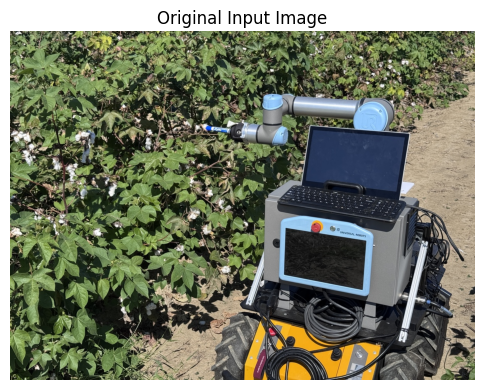

In [ ]:
plt.figure(figsize=(6, 6))
plt.title("Original Input Image")
plt.imshow(cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

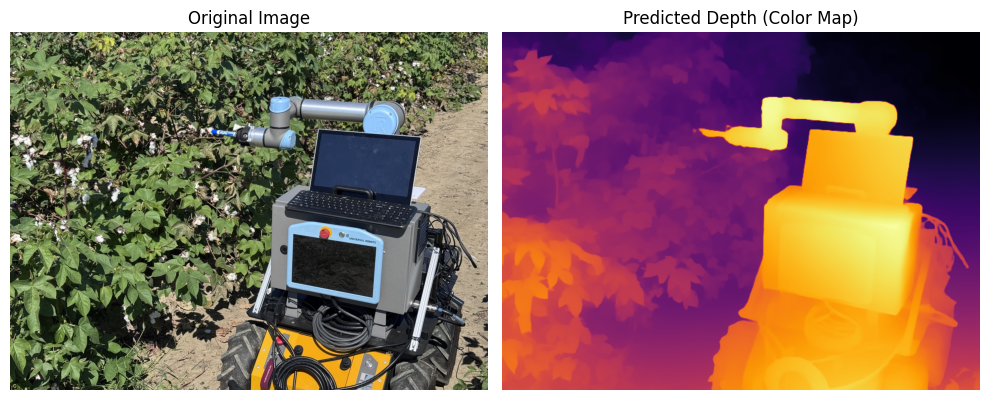

✅ Depth maps saved:
outputs/apple_depth_gray.png
outputs/apple_depth_color.png


In [ ]:

# --- Inference ---
depth = model.infer_image(raw_img)

# --- Normalize to 8-bit for saving/display ---
depth_normalized = (depth - depth.min()) / (depth.max() - depth.min())
depth_8bit = (depth_normalized * 255).astype(np.uint8)

# --- Apply color map ---
depth_colormap = cv2.applyColorMap(depth_8bit, cv2.COLORMAP_INFERNO)




plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Predicted Depth (Color Map)")
plt.imshow(cv2.cvtColor(depth_colormap, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()



In [ ]:
os.makedirs('outputs', exist_ok=True)
base = os.path.splitext(os.path.basename(img_path))[0]
save_path_gray = f'outputs/{base}_depth_gray.png'
save_path_color = f'outputs/{base}_depth_color.png'
cv2.imwrite(save_path_gray, depth_8bit)
cv2.imwrite(save_path_color, depth_colormap)
print(f"✅ Depth maps saved:\n{save_path_gray}\n{save_path_color}")

✅ Depth maps saved:
outputs/apple_depth_gray.png
outputs/apple_depth_color.png
